<a href="https://colab.research.google.com/github/sandhrabijoy/practice/blob/main/LASSO_AND_RIDGE_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Predicted values  [ 40831.44 122898.14  65078.42]
Real values       [ 37731. 122391.  57081.]
Trained W         9325.76
Trained b         26842.8


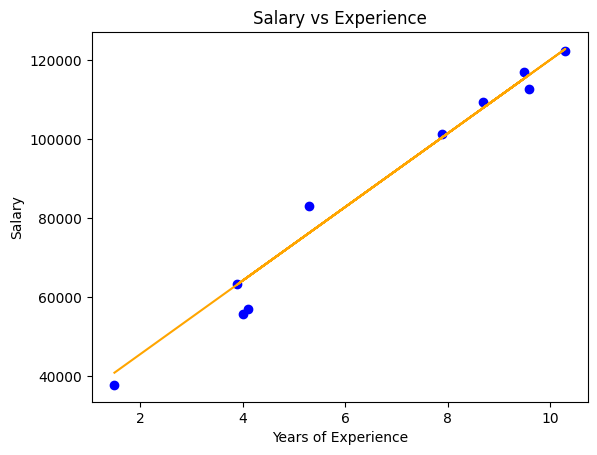

In [3]:
# Ridge Regression

class RidgeRegression() :

    def __init__( self, learning_rate, iterations, l2_penality ) :

        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l2_penality = l2_penality

    # Function for model training
    def fit( self, X, Y ) :

        # no_of_training_examples, no_of_features
        self.m, self.n = X.shape

        # weight initialization
        self.W = np.zeros( self.n )

        self.b = 0
        self.X = X
        self.Y = Y

        # gradient descent learning

        for i in range( self.iterations ) :
            self.update_weights()
        return self

    # Helper function to update weights in gradient descent

    def update_weights( self ) :
        Y_pred = self.predict( self.X )

        # calculate gradients
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +
               ( 2 * self.l2_penality * self.W ) ) / self.m
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m

        # update weights
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
        return self

    # Hypothetical function  h( x )
    def predict( self, X ) :
        return X.dot( self.W ) + self.b

# Driver code

def main() :

    # Importing dataset
    df = pd.read_csv( "/content/drive/MyDrive/Salary_Data.csv" )
    X = df.iloc[:, :-1].values
    Y = df.iloc[:, 1].values

    # Splitting dataset into train and test set
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y,

                                          test_size = 1 / 3, random_state = 0 )

    # Model training
    model = RidgeRegression( iterations = 1000,
                            learning_rate = 0.01, l2_penality = 1 )
    model.fit( X_train, Y_train )

    # Prediction on test set
    Y_pred = model.predict( X_test )
    print( "Predicted values ", np.round( Y_pred[:3], 2 ) )
    print( "Real values      ", Y_test[:3] )
    print( "Trained W        ", round( model.W[0], 2 ) )
    print( "Trained b        ", round( model.b, 2 ) )

    # Visualization on test set
    plt.scatter( X_test, Y_test, color = 'blue' )
    plt.plot( X_test, Y_pred, color = 'orange' )
    plt.title( 'Salary vs Experience' )
    plt.xlabel( 'Years of Experience' )
    plt.ylabel( 'Salary' )
    plt.show()

if __name__ == "__main__" :
    main()

0.4985456964359505


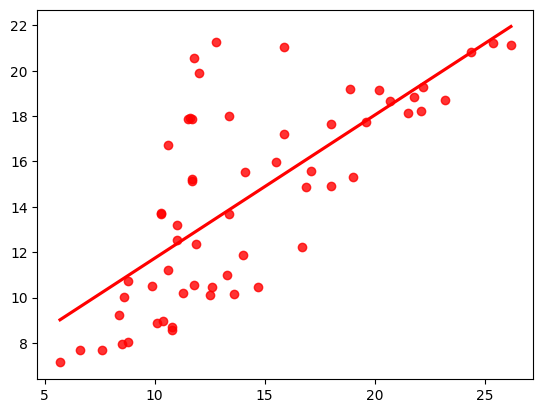

In [4]:
#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
df=pd.read_csv('/content/drive/MyDrive/tvmarketing.csv')

y=df['Sales']
x=df['TV']

y=np.array(y).reshape(-1,1)
x=np.array(x).reshape(-1,1)



x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3)

clf=Lasso()
model=clf.fit(x_train,y_train)
y_predict=model.predict(x_test)

print(metrics.r2_score(y_test,y_predict))
sns.regplot(x=y_test,y=y_predict,ci=None,color ='red');